In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [2]:
df=pd.read_csv("/content/BIKE DETAILS.csv")

In [114]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [115]:
df.head(10).shape

(10, 7)

In [4]:
df.shape

(1061, 7)

In [5]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [6]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [9]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


Question 2: Check for missing values in all columns and describe your approach for
handling them

In [18]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [22]:
'''we have 435 entries which are null in the column ex showroom price
for the missing values we can treat it by drop the column if the missing value is more than 40 percent of the total entries in the column
or we can replace by the mean when outlier is not present
or with the median if the outlier is present
since it is not a categorical cloumn we can cannot impute it by mode value
for the other columns there is no missing value
'''


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.

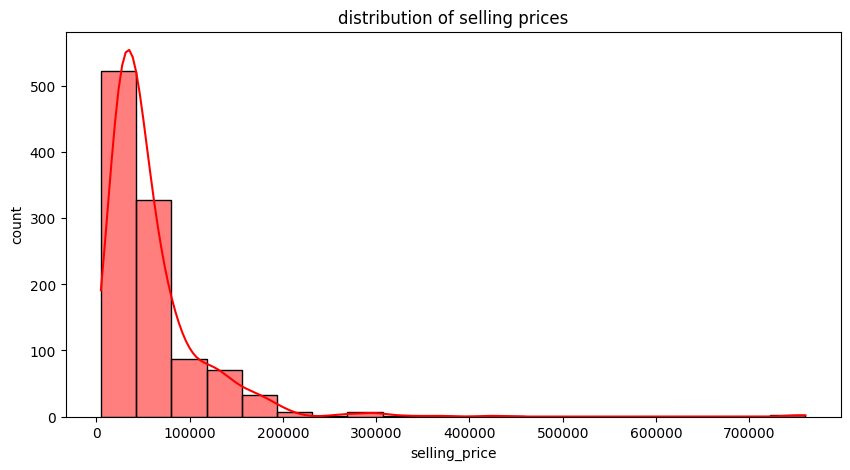

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df.selling_price,bins=20,kde=True,color="r")
plt.xlabel("selling_price")
plt.ylabel("count")
plt.title("distribution of selling prices")
plt.show()

In [ ]:
'''
the distribution is right skewed,as tail is extending towards the right,
almost 90 percent of the bike are below the price of 200000
few of the bikes are above this price which can be attributed to various factors the highest price of the bike can be seen more than 7lakh
hence it will be an outlier for the rest of the price range
'''

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

In [27]:
df.sample()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
642,TVS Apache RTR 160,15000,2009,Individual,4th owner,880000,NaN


In [29]:
df.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [37]:
mean_value = round(df.groupby('seller_type')['selling_price'].mean(),0)

In [38]:
mean_value

,selling_price
seller_type,
Dealer,46667.0
Individual,59712.0


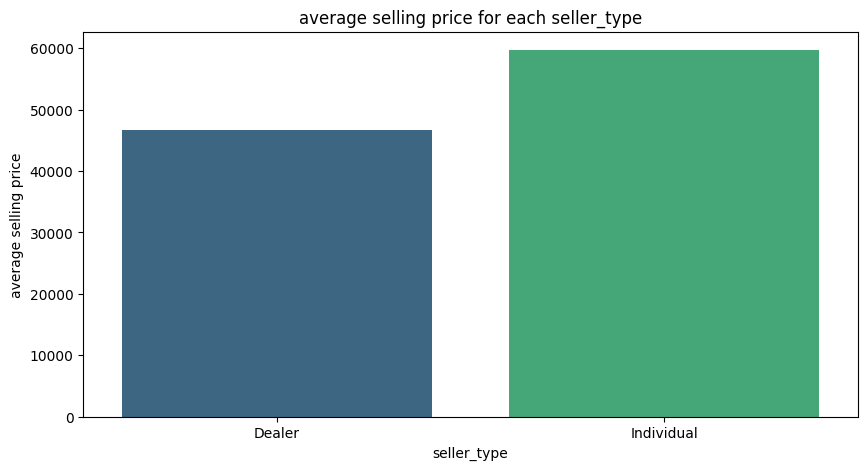

In [43]:
#plotting barplot
plt.figure(figsize=(10,5))
sns.barplot(x=mean_value.index,y=mean_value.values,palette="viridis")
plt.xlabel("seller_type")
plt.ylabel("average selling price")
plt.title("average selling price for each seller_type")
plt.show()

In [ ]:
'''
the average selling price for the bikes for seller type individual is more than average selling price for seller type dealer
'''

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

In [45]:
df.sample(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
503,Bajaj Platina 100,20000,2012,Individual,1st owner,16295,NaN
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [49]:
km_by_owner = round(df.groupby('owner')['km_driven'].mean(),0)

In [50]:
km_by_owner

,km_driven
owner,
1st owner,32817.0
2nd owner,39289.0
3rd owner,33292.0
4th owner,311500.0


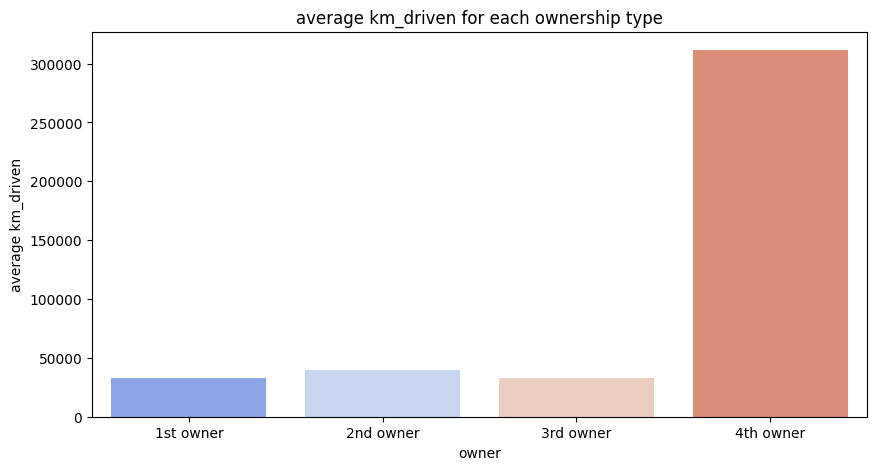

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=km_by_owner.index,y=km_by_owner.values,palette="coolwarm")
plt.xlabel("owner")
plt.ylabel("average km_driven")
plt.title("average km_driven for each ownership type")
plt.show()

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [63]:
df1=df.copy()

In [64]:
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [66]:
df1.km_driven.describe()

,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000


<Axes: >

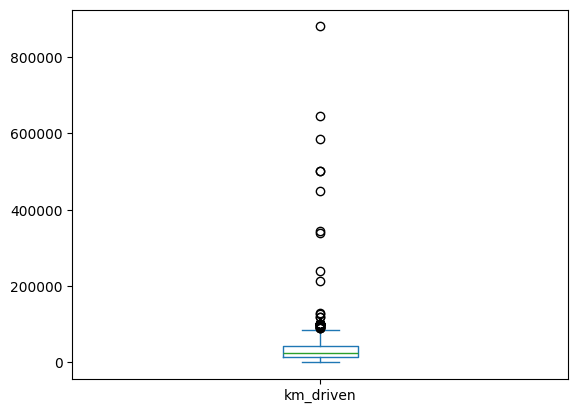

In [77]:
df1.km_driven.plot(kind="box")

In [67]:
q1=df1.km_driven.quantile(0.25)
q3=df1.km_driven.quantile(0.75)
iqr=q3-q1
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr
#we want to drop the outlier

In [70]:
df1_filtered = df1[(df1.km_driven >= lower_fence) & (df1.km_driven <= upper_fence)]

In [73]:
df1_filtered.shape

(1022, 7)

<Axes: >

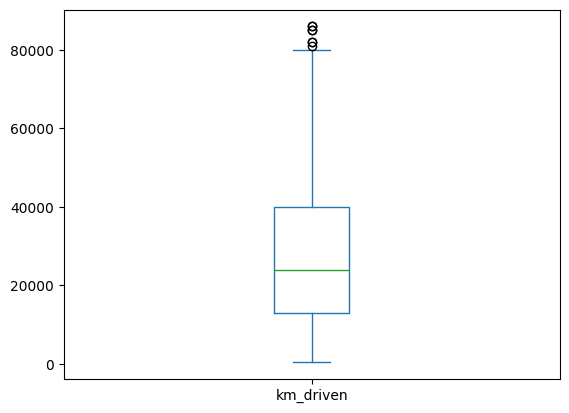

In [76]:
df1_filtered.km_driven.plot(kind='box')

In [78]:
df1_filtered.km_driven.describe()

,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


In [79]:
q1=df1_filtered.km_driven.quantile(0.25)
q3=df1_filtered.km_driven.quantile(0.75)
iqr=q3-q1
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr

In [80]:
df2= df1_filtered[(df1_filtered.km_driven >= lower_fence) & (df1_filtered.km_driven <= upper_fence)]

In [82]:
df2.shape

(1015, 7)

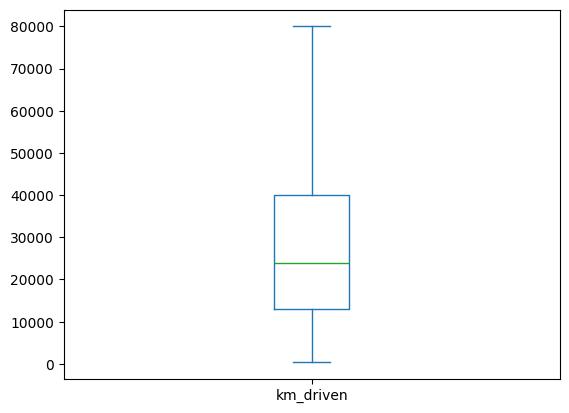

In [84]:
df2.km_driven.plot(kind="box")
plt.show()

In [ ]:
#therefore the outliers are removed after two steps of removing the outlier

Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


In [85]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


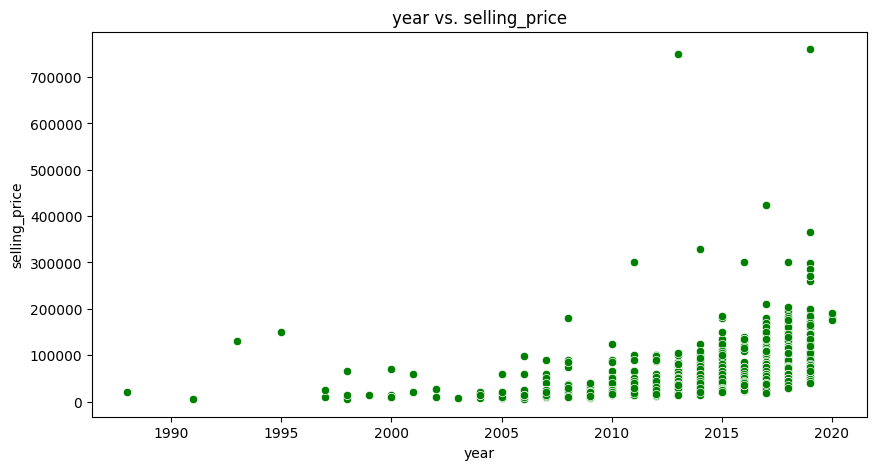

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.year,y=df.selling_price,color='g')
plt.xlabel("year")
plt.ylabel("selling_price")
plt.title("year vs. selling_price")
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [93]:
df1=df.copy()

In [94]:
df1.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [88]:
#we create a binary vector for each category
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [95]:
encoded_data=encoder.fit_transform(df1[['seller_type']]).toarray()

In [96]:
encoder.get_feature_names_out()

array(['seller_type_Dealer', 'seller_type_Individual'], dtype=object)

In [97]:
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

In [98]:
df1.drop("seller_type",axis=1,inplace=True)

In [99]:
#concatenating to get the final dataframe
final_df=pd.concat([df1,encoded_df],axis=1)

In [100]:
final_df

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,0.0,1.0
1,Honda Dio,45000,2017,1st owner,5650,NaN,0.0,1.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,0.0,1.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,0.0,1.0
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,1st owner,500000,52000.0,0.0,1.0
1057,Honda CB twister,16000,2012,1st owner,33000,51000.0,0.0,1.0
1058,Bajaj Discover 125,15000,2013,2nd owner,35000,57000.0,0.0,1.0
1059,Honda CB Shine,12000,2009,1st owner,53000,58000.0,0.0,1.0


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

In [106]:
final_df.shape

(1061, 8)

In [107]:
final_df.dtypes

,0
name,object
selling_price,int64
year,int64
owner,object
km_driven,int64
ex_showroom_price,float64
seller_type_Dealer,float64
seller_type_Individual,float64


In [109]:
final_df.drop(['name','owner'],axis=1,inplace=True)

In [110]:
final_df

,selling_price,year,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,175000,2019,350,NaN,0.0,1.0
1,45000,2017,5650,NaN,0.0,1.0
2,150000,2018,12000,148114.0,0.0,1.0
3,65000,2015,23000,89643.0,0.0,1.0
4,20000,2011,21000,NaN,0.0,1.0
...,...,...,...,...,...,...
1056,17000,2010,500000,52000.0,0.0,1.0
1057,16000,2012,33000,51000.0,0.0,1.0
1058,15000,2013,35000,57000.0,0.0,1.0
1059,12000,2009,53000,58000.0,0.0,1.0


In [111]:
corr=final_df.corr()

In [112]:
corr

,selling_price,year,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.017382,0.017382
year,0.402188,1.000000,-0.288675,0.126378,-0.050293,0.050293
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.001314,-0.001314
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,0.000517,-0.000517
seller_type_Dealer,-0.017382,-0.050293,0.001314,0.000517,1.000000,-1.000000
seller_type_Individual,0.017382,0.050293,-0.001314,-0.000517,-1.000000,1.000000


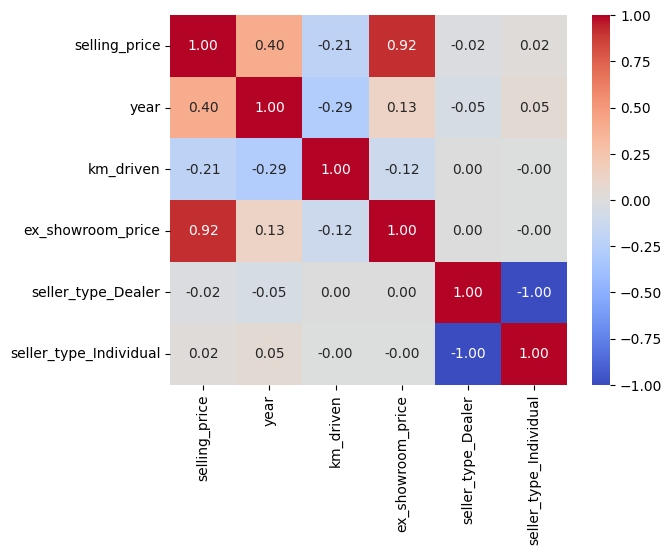

In [113]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.


In [ ]:
'''
1. The majority of the bike's selling price is below 2lakhs,but there are few bike which have higher selling price than the rest.
2. 4rth owner had the highest average for km driven ,hence it seems that 4rth user drive the bike more often than the other owner and hence their bike's age
   is more or are older bikes.
3. The average selling price for the bikes for seller type individual is more than average selling price for seller type dealer.
4. New bikes are costly or are with 1st owner, while the older bikers or with 3rd or 4rth owner are cheap.
'''
''''
The important feature which are effecting the selling price are:-
1. ex_showroom_price
2. year
3. km driven
'''
'''
1.treating the missing values
2. treatment of the outlier
#feature engineering
1.one hot encoding for the categorical column-seller type
'''


